In [205]:
pip install altair

     |████████████████████████████████| 727 kB 3.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [202]:
pip install vega_datasets

     |████████████████████████████████| 210 kB 2.9 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [215]:
import pandas as pd
import matplotlib.pyplot as plt
from bokeh.io import output_notebook, show
from bokeh.plotting import figure, show
from datetime import datetime, timedelta
import plotly.express as px
from bokeh.models import DatetimeTickFormatter, NumeralTickFormatter
import vega_datasets
import altair as alt

In [9]:
pip install bokeh

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install pyviz holoviews bokeh

     |████████████████████████████████| 16.4 MB 3.3 MB/s eta 0:00:01    |▋                               | 307 kB 1.4 MB/s eta 0:00:12     |██████▌                         | 3.3 MB 2.7 MB/s eta 0:00:05     |████████▍                       | 4.3 MB 2.7 MB/s eta 0:00:05     |█████████                       | 4.6 MB 2.7 MB/s eta 0:00:05     |██████████████▌                 | 7.5 MB 1.9 MB/s eta 0:00:05     |██████████████▉                 | 7.6 MB 1.9 MB/s eta 0:00:05██████████████▋                | 8.0 MB 1.9 MB/s eta 0:00:05     |████████████████████            | 10.2 MB 1.9 MB/s eta 0:00:04     |█████████████████████▏          | 10.9 MB 649 kB/s eta 0:00:09     |██████████████████████████▉     | 13.8 MB 2.9 MB/s eta 0:00:01     |████████████████████████████▏   | 14.5 MB 2.9 MB/s eta 0:00:01     |████████████████████████████████| 16.4 MB 3.3 MB/s eta 0:00:01
     |████████████████████████████████| 4.3 MB 1.8 MB/s eta 0:00:01     |████▉                           | 645 kB 278 kB/s eta 0:0

                  freetype: no  [The C/C++ header for freetype2 (ft2build.h)
                            could not be found.  You may need to install the
                            development package.]
                       png: yes [version 1.6.37]
                     qhull: yes [pkg-config information for 'libqhull' could not
                            be found. Using local copy.]
    
    OPTIONAL SUBPACKAGES
               sample_data: yes [installing]
                  toolkits: yes [installing]
                     tests: no  [skipping due to configuration]
            toolkits_tests: no  [skipping due to configuration]
    
    OPTIONAL BACKEND EXTENSIONS
                       agg: yes [installing]
                     tkagg: yes [installing; run-time loading from Python Tcl /
                            Tk]
                    macosx: no  [Mac OS-X only]
                 windowing: no  [Microsoft Windows only]
    
    OPTIONAL PACKAGE DATA
                      dlls: no 

In [28]:
output_notebook()

Loading BokehJS ...

In [216]:
df = pd.read_csv('DataFramesAñadidos.csv')

In [217]:
df.head(1)

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,near_event,tiempo,near_event_date,NasaBudgetYear,NasaBudgetMillions,Film,YearFilm
0,1949-10-10,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,4/27/2004,29.883056,-97.941111,NaN,NaN,NaN,1949-01-01,48.652,Superman (serial),1948-01-01


In [218]:
df["monthgroupby"] = pd.DatetimeIndex(df['datetime']).month

In [219]:
df["yeargroupby"] = pd.DatetimeIndex(df['datetime']).year

In [220]:
df.sample()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,near_event,tiempo,near_event_date,NasaBudgetYear,NasaBudgetMillions,Film,YearFilm,monthgroupby,yeargroupby
8341,2006-11-17,fair oaks,tx,us,triangle,600.0,10 minutes,I saw a bright when it hoverd over me it was a...,12/7/2006,31.486667,-96.307222,Cassini spacecraft sends back images of Saturn...,869 days,2004-07-01,2006-01-01,"15,125",Superman Returns,2006-01-01,11,2006


In [241]:
df.types()

AttributeError: 'DataFrame' object has no attribute 'types'

In [280]:
import folium
from folium import Choropleth, Circle, Marker, Icon, Map, TileLayer
from folium.plugins import HeatMap, MarkerCluster
import geopandas as gpd
import pandas as pd
import json
geo_json = r"us-state-boundaries.geojson"

In [282]:
with open (geo_json) as geo_file:
    geo_usa_states = json.load(geo_file)

In [283]:
type(geo_usa_states)

dict

In [284]:
geo_usa_states.keys()

dict_keys(['type', 'features'])

In [285]:
type(geo_usa_states["features"])

list

In [287]:
len(geo_usa_states["features"])

56

In [288]:
states = []
for n in range(len(geo_usa_states["features"])):
    states.append(geo_usa_states["features"][n]["properties"]["name"])

In [292]:
df2["states"] = states

NameError: name 'df2' is not defined

In [356]:
dfstatesusa = pd.DataFrame()

In [357]:
dfstatesusa["States"] = states

In [381]:
dfstatesusa

,States
0,Puerto Rico
1,Commonwealth of the Northern Mariana Islands
2,Arkansas
3,West Virginia
4,Rhode Island
5,Washington
6,Louisiana
7,Minnesota
8,New Hampshire
9,California


In [376]:
dfstatesusa["Values"] = dfstatesusa["States"].iloc[statesvalores["index"]]

ValueError: invalid literal for int() with base 10: 'California'

In [383]:
dfmerge = dfstatesusa.merge(statesvalores, how = 'right')

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

In [330]:
#Casos por año y mes
a = df["yeargroupby"].value_counts()
b = df["monthgroupby"].value_counts()
statesvalores = df["state"].value_counts().to_frame()

In [332]:
statesvalores = statesvalores.reset_index()

In [364]:
statesvalores['index'] = statesvalores['index'].str.upper()

In [365]:
statesvalores.head()

,index,state
0,CA,7196
1,FL,3278
2,WA,2910
3,TX,2831
4,NY,2282


In [369]:
for i in range(len(statesvalores)):
    statesvalores["index"].replace(abbrev_to_us_state,inplace=True)

In [370]:
statesvalores

,index,state
0,California,7196
1,Florida,3278
2,Washington,2910
3,Texas,2831
4,New York,2282
5,Arizona,1980
6,Pennsylvania,1929
7,Illinois,1912
8,Ohio,1781
9,North Carolina,1437


In [391]:
states_map = folium.Map(location=[46.416775, -90.703790], zoom_start=3, tiles="cartodbpositron")

In [393]:
states_map.choropleth(
    geo_data = geo_json, #geojson con los polígonos LA RUTA AL ARCHIVO EN MI ORDENADOR
    data = statesvalores, #dataframe con los datos 
    columns = ["index", "state"], #columnas del dataframe que utilizamos
    key_on = "feature.properties.name", # dato geojson polígono de donde salen los nombres TIENE QUE HACER MATCH CON EL DF, 
    fill_color = "YlGnBu", #gama de colores 
    fill_opacity = 0.5, #opacidad del relleno 
    line_opacity = 1, #opacidad de la línea
    legend_name = "Datitos inventados por comunidad",  #nombre de la leyenda
    smooth_factor = 1 # suavidad de la línea
)
states_map

/home/luisserrano/.local/lib/python3.8/site-packages/folium/folium.py:409: FutureWarning:

The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.



In [360]:
abbrev_to_us_state = dict(map(reversed, us_state_to_abbrev.items()))

In [363]:
abbrev_to_us_state

{'AL': 'Alabama',
 'AK': 'Alaska',
 'AZ': 'Arizona',
 'AR': 'Arkansas',
 'CA': 'California',
 'CO': 'Colorado',
 'CT': 'Connecticut',
 'DE': 'Delaware',
 'FL': 'Florida',
 'GA': 'Georgia',
 'HI': 'Hawaii',
 'ID': 'Idaho',
 'IL': 'Illinois',
 'IN': 'Indiana',
 'IA': 'Iowa',
 'KS': 'Kansas',
 'KY': 'Kentucky',
 'LA': 'Louisiana',
 'ME': 'Maine',
 'MD': 'Maryland',
 'MA': 'Massachusetts',
 'MI': 'Michigan',
 'MN': 'Minnesota',
 'MS': 'Mississippi',
 'MO': 'Missouri',
 'MT': 'Montana',
 'NE': 'Nebraska',
 'NV': 'Nevada',
 'NH': 'New Hampshire',
 'NJ': 'New Jersey',
 'NM': 'New Mexico',
 'NY': 'New York',
 'NC': 'North Carolina',
 'ND': 'North Dakota',
 'OH': 'Ohio',
 'OK': 'Oklahoma',
 'OR': 'Oregon',
 'PA': 'Pennsylvania',
 'RI': 'Rhode Island',
 'SC': 'South Carolina',
 'SD': 'South Dakota',
 'TN': 'Tennessee',
 'TX': 'Texas',
 'UT': 'Utah',
 'VT': 'Vermont',
 'VA': 'Virginia',
 'WA': 'Washington',
 'WV': 'West Virginia',
 'WI': 'Wisconsin',
 'WY': 'Wyoming',
 'DC': 'District of Columbia

# Cosas que quiero visualizar:

 - Evolución casos por año y estado.
 lineplot por año y línea para cada estado. plotlyexpress
 mapa coroplético
 - Cómo afectan las películas
 - Cómo afecta el presu Nasa
 - Cómo afectan los eventos
 boxplot para cada uno
 boxplot separando por peliculas
 - Frecuencia de algún día específico (día duplicado)
 ver los duplicados
 - Algún insight en la figura o en la duración del evento.
 trastea

In [ ]:
import plotly.express as px

In [49]:
#sample

In [169]:
import seaborn as sns
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

In [230]:
#df.head()

<AxesSubplot:xlabel='yeargroupby', ylabel='count'>

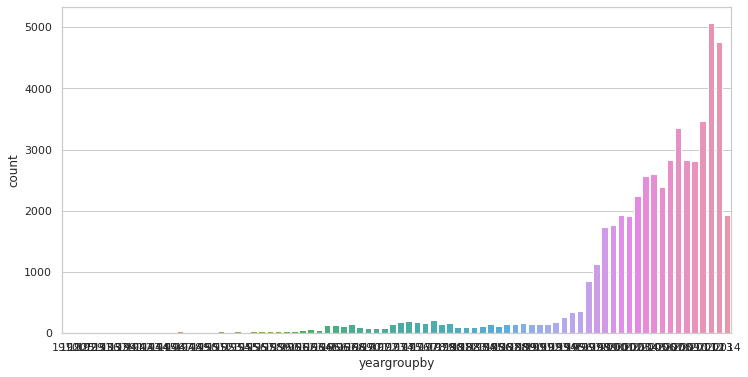

In [231]:
sns.countplot(x='yeargroupby', data=df)

In [235]:
sns.countplot(x='state', data=df,order=df['state'])

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f77acffee50> (for post_execute):


KeyboardInterrupt: 

In [ ]:
sns.countplot(x="monthgroupby", data=df,order=df['monthgroupby'])

<AxesSubplot:xlabel='yeargroupby', ylabel='YearFilm'>

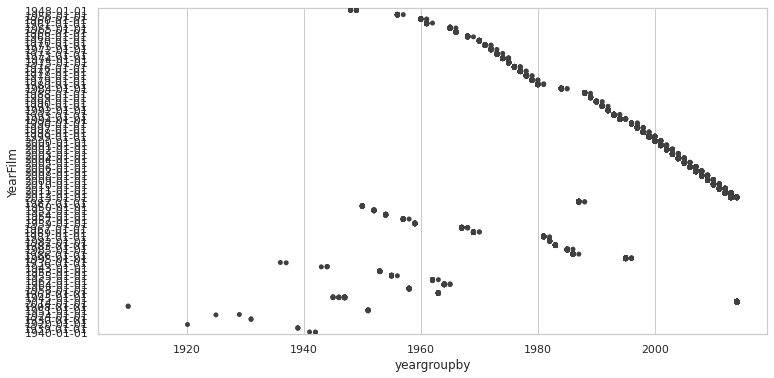

In [240]:
sns.stripplot(x="yeargroupby", y="YearFilm", data=df, color=".25")

In [243]:
pip install funpymodeling

     |████████████████████████████████| 215 kB 951 kB/s eta 0:00:01
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2
Note: you may need to restart the kernel to use updated packages.


In [244]:
from funpymodeling.exploratory import freq_tbl, status, profiling_num, cat_vars, num_vars

In [247]:
state_freq = freq_tbl(df['state'])

In [248]:
state_freq.head()

,state,frequency,percentage,cumulative_perc
0,ca,7196,0.138638,0.138638
1,fl,3278,0.063154,0.201792
2,wa,2910,0.056064,0.257856
3,tx,2831,0.054542,0.312398
4,ny,2282,0.043965,0.356363


<AxesSubplot:xlabel='state', ylabel='frequency'>

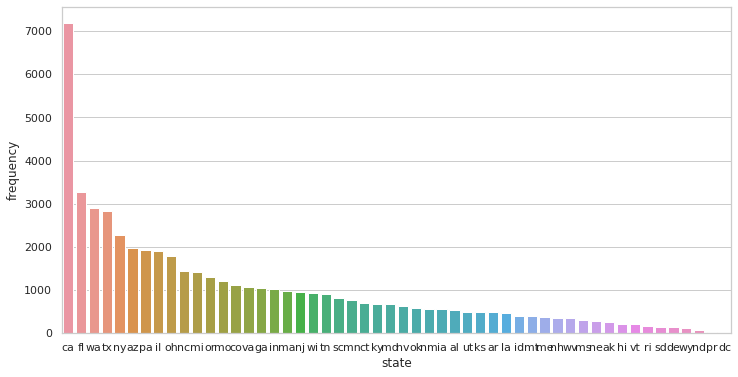

In [265]:
sns.barplot(data=state_freq,x='state',y='frequency')

In [269]:
dt_year_1900_1949= df.loc[(df['yeargroupby'] >= 1900) & (df['yeargroupby'] <= 1949)]
dt_year_1940_1979= df.loc[(df['yeargroupby'] >= 1950) & (df['yeargroupby'] <= 1979)]
dt_year_1980_2020= df.loc[(df['yeargroupby'] >= 1980) & (df['yeargroupby'] <= 2020)]

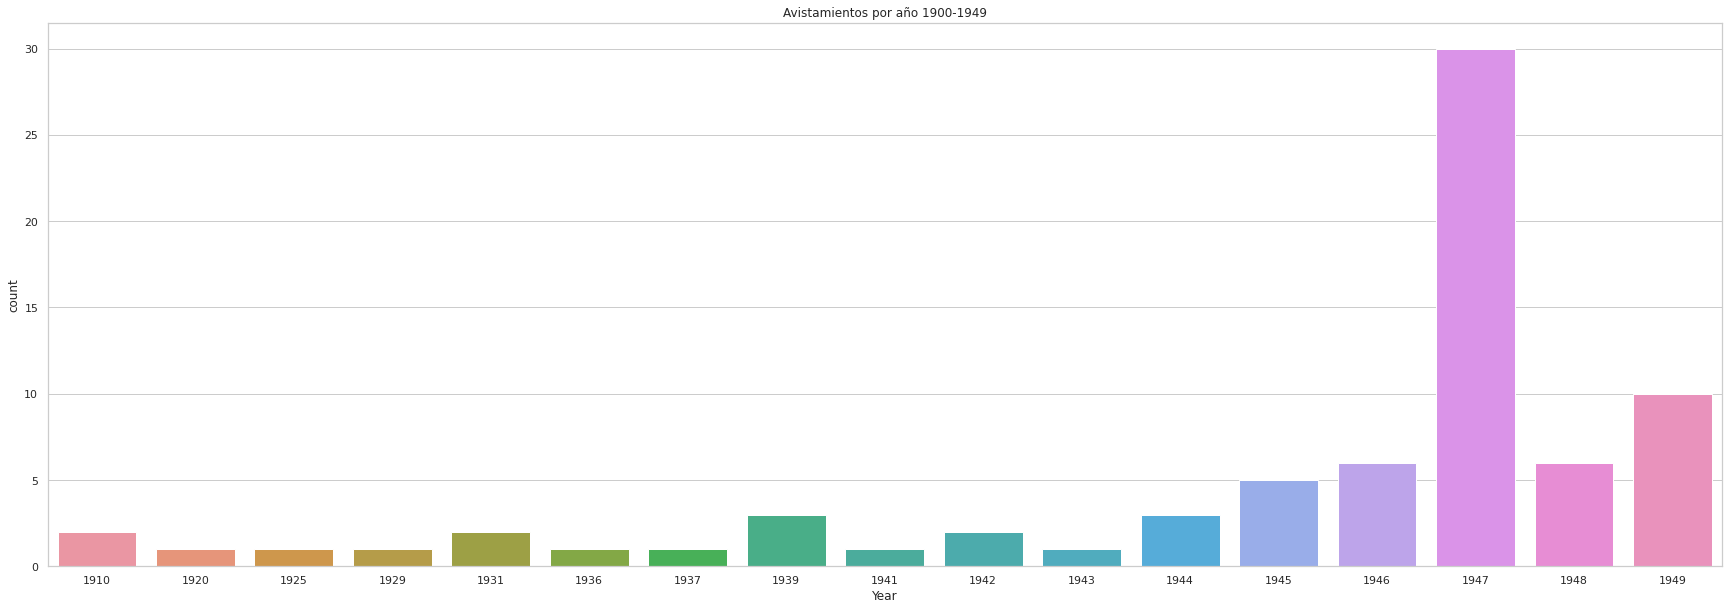

In [270]:
plt.figure(figsize=(30,10))
sns.countplot(x=dt_year_1900_1949['yeargroupby'])
plt.title('Avistamientos por año 1900-1949')
plt.xlabel('Year')
plt.show()

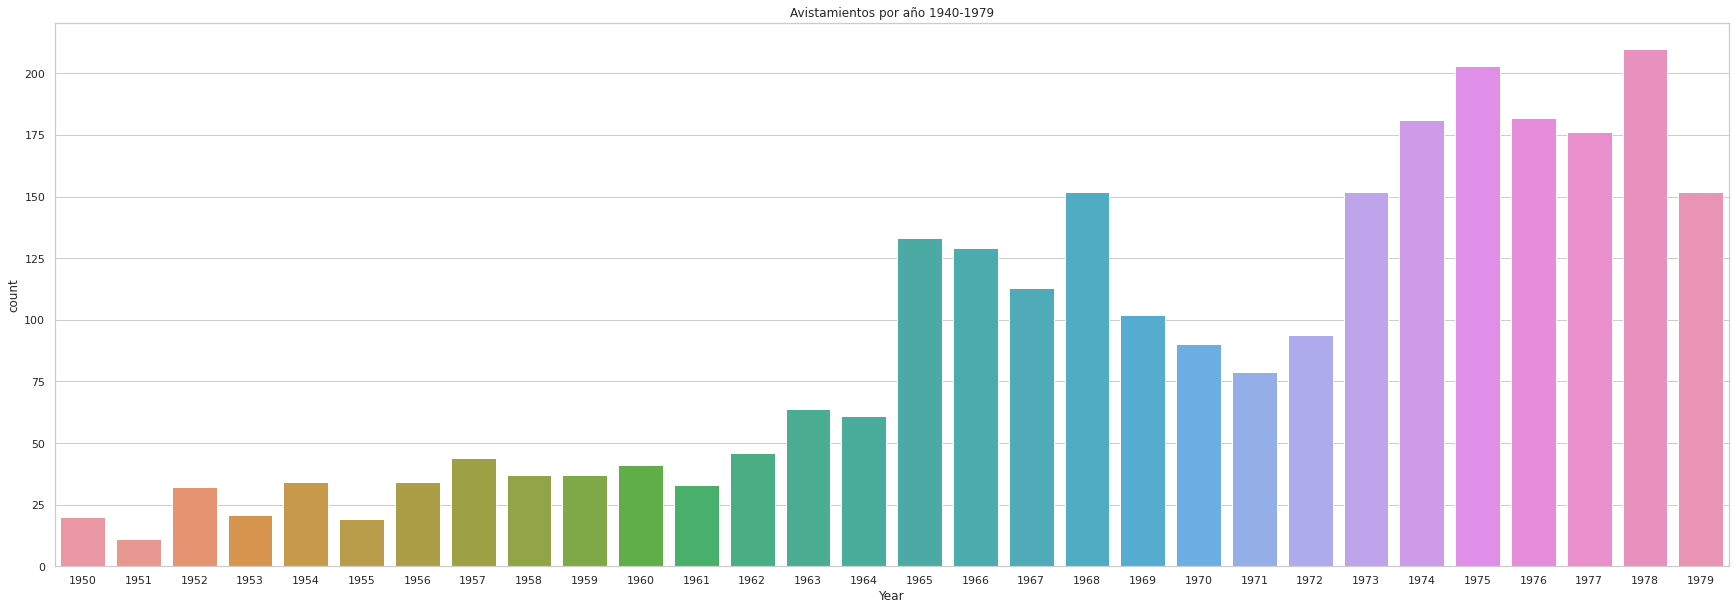

In [273]:
plt.figure(figsize=(30,10))
sns.countplot(x=dt_year_1940_1979['yeargroupby'])
plt.title('Avistamientos por año 1940-1979')
plt.xlabel('Year')
plt.show()

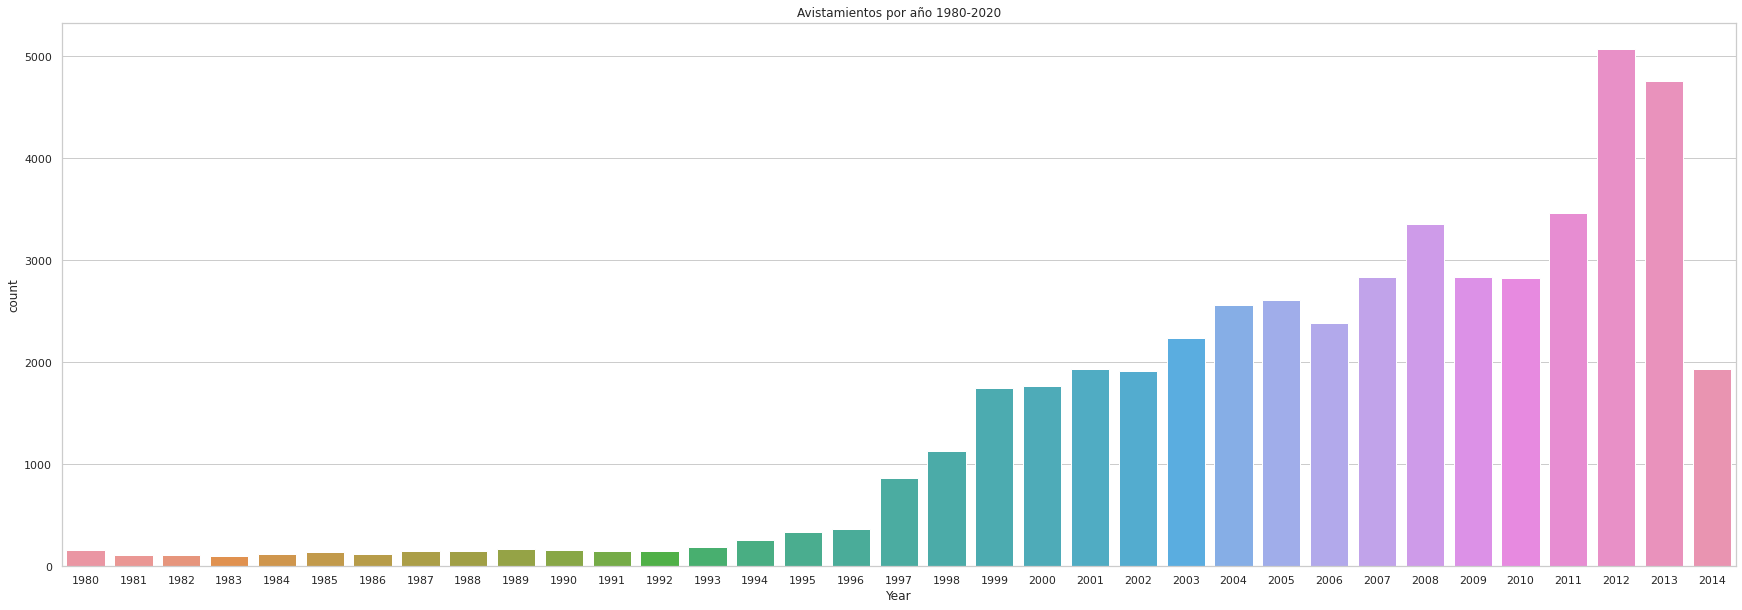

In [274]:
plt.figure(figsize=(30,10))
sns.countplot(x=dt_year_1980_2020['yeargroupby'])
plt.title('Avistamientos por año 1980-2020')
plt.xlabel('Year')
plt.show()

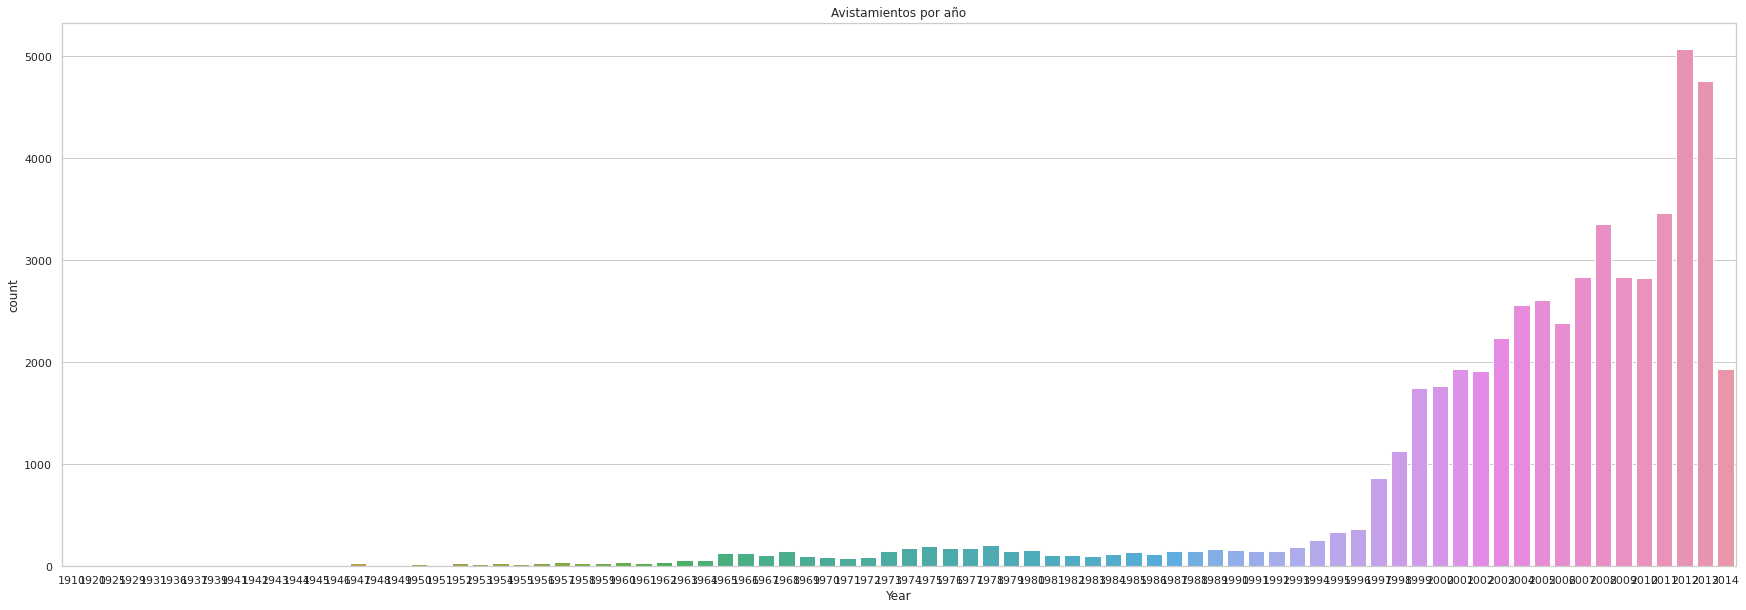

In [266]:
plt.figure(figsize=(30,10))
sns.countplot(x=dt_year_1940_1979['yeargroupby'])
plt.title('Avistamientos por año')
plt.xlabel('Year')
plt.show()

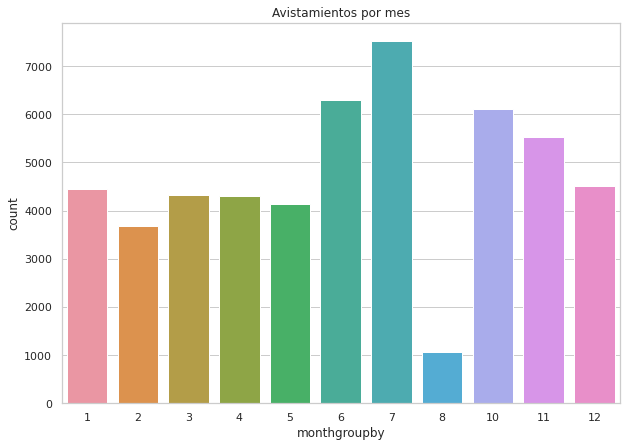

In [275]:
plt.figure(figsize=(10,7))
sns.countplot(x=df['monthgroupby'])
plt.title('Avistamientos por mes')
plt.show()

In [208]:
alt.Chart(df).mark_line().encode(
    x='datetime',
    y='country'
)

ValueError: datetime encoding field is specified without a type; the type cannot be inferred because it does not match any column in the data.

alt.Chart(...)